In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn

In [2]:
import pandas as pd
data = pd.read_csv('datos.csv')
data

,x_1,x_2,y
0,-1.851357e+14,3.565394e+13,0
1,5.715585e+14,-8.484241e+13,1
2,5.175931e+14,-1.231538e+14,1
3,5.966117e+14,-1.778714e+14,1
4,4.207345e+14,-1.175593e+14,1
...,...,...,...
16379,7.025930e+14,-1.572575e+14,0
16380,-8.740727e+13,7.636715e+13,0
16381,4.867707e+14,-1.507269e+14,1
16382,6.819048e+14,-1.245187e+14,1


In [3]:
from sklearn.model_selection import train_test_split

X = data.values[:,:2]
y = data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

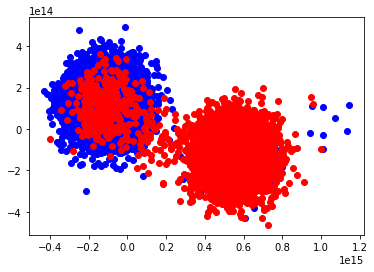

In [4]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [5]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler(quantile_range=(0.25,0.75)).fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

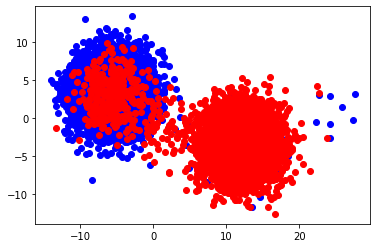

In [6]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[5,500,5]}
abc = AdaBoostClassifier(random_state=0)
clf = GridSearchCV(abc,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'n_estimators': 5}


In [11]:
n_estimators = clf.best_params_['n_estimators']
clf = AdaBoostClassifier(n_estimators= n_estimators)
clf.fit(X_train, y_train)
print('Score is: ',clf.score(X_test,y_test))

Score is:  0.9542310821806347


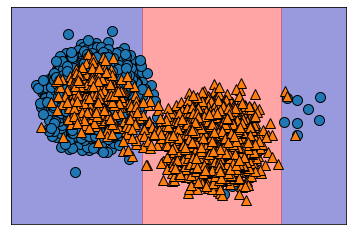

In [12]:
mglearn.plots.plot_2d_separator(clf,X_train,fill=True,alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [14]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'n_estimators':[5,500,5]}
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=0),random_state=0)
clf = GridSearchCV(abc,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'n_estimators': 5}


In [15]:
n_estimators = clf.best_params_['n_estimators']
clf = AdaBoostClassifier(n_estimators= n_estimators)
clf.fit(X_train, y_train)
print('Score is: ',clf.score(X_test,y_test))

Score is:  0.9542310821806347


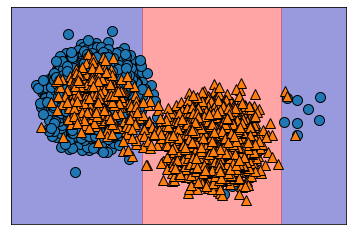

In [16]:
mglearn.plots.plot_2d_separator(clf,X_train,fill=True,alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)